<a href="https://colab.research.google.com/github/TzuyusForgottenLuggage/DeepLearing_Workshop/blob/main/Workshop_Day4_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


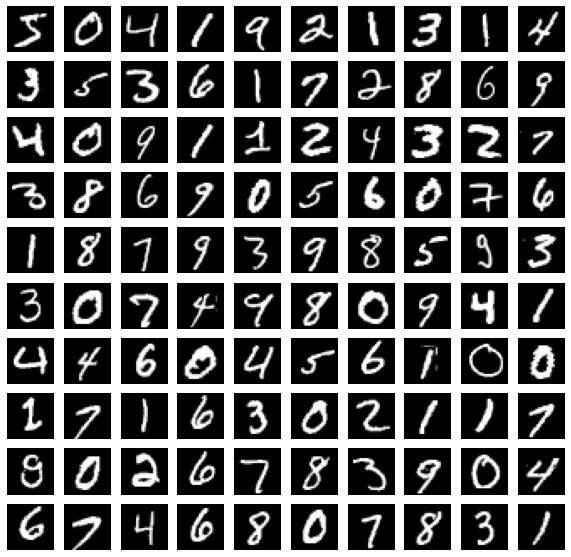

In [4]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, 1+i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap = 'gray')

In [5]:
x_train = X_train / 255

In [6]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [7]:
codings_size = 50

generator = keras.models.Sequential([
                     keras.layers.Dense(100, activation = 'selu', input_shape = [codings_size]),
                     keras.layers.Dense(150, activation = 'selu'),
                     keras.layers.Dense(28*28, activation = 'sigmoid'),
                     keras.layers.Reshape([28,28])   
])

In [8]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 138,634
Trainable params: 138,634
Non-trainable params: 0
_________________________________________________________________


In [9]:
discriminator = keras.models.Sequential([
                      keras.layers.Flatten(input_shape = [28,28]),
                      keras.layers.Dense(150, activation = 'selu'),
                      keras.layers.Dense(100, activation = 'selu'),
                      keras.layers.Dense(1, activation = 'sigmoid'),
])

In [10]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [11]:
gan = keras.models.Sequential([generator, discriminator])
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28)            138634    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 132951    
Total params: 271,585
Trainable params: 271,585
Non-trainable params: 0
_________________________________________________________________


In [12]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')
discriminator.trainable = False
gan.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [13]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
  generators, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:

      noise = tf.random.normal(shape = [batch_size, codings_size])
      generated_images = generator(noise)

      X_batch = tf.cast(X_batch, tf.float32)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)


      noise = tf.random.normal(shape = [batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)

In [14]:
train_gan(gan,dataset, batch_size, codings_size, 5)

In [15]:
noise = tf.random.normal(shape = [100, codings_size])
generated_images = generator(noise)
generated_images.shape

TensorShape([100, 28, 28])

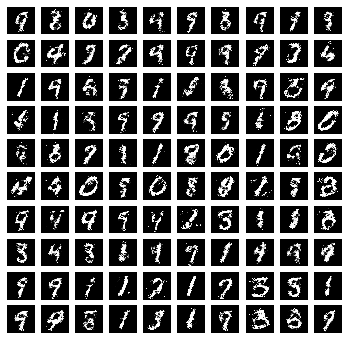

In [16]:
plt.figure(figsize=(6,6))
for i in range(100):
    plt.subplot(10, 10, 1+i)
    plt.axis('off')
    plt.imshow(generated_images[i], cmap = 'gray')